In [1]:
import pandas as pd
from functools import reduce
import numpy as np
import gc
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
pd.set_option('display.max_columns', None)

### Read data from a feather binary file with Pandas

In [2]:
data = pd.read_feather("../data/finaldata/fact_data.feather")

### Find all numeric columns and fill all NA/NAN values with zeros

In [3]:
tmp_data = data._get_numeric_data()
tmp_data = tmp_data.fillna(0)
tmp_data.head()

,product_volume,number_of_blood_product_units_processed,number_of_donation_units_processed,number_of_duplicated_donation_units,number_of_skipped_donation_barcodes,number_of_donation_alarms,number_of_alerts,number_of_duplicated_exception_units,number_of_reprocessed_units,number_of_inconclusive_sealed_units,number_of_unrecognized_barcodes,number_of_skipped_exception_barcodes,number_of_temp_out_of_range_exceptions,number_of_exception_alarms,procedure_duration_minutes,idle_time_duration_minutes,load_duration_minutes,unload_duration_minutes,load_idle_time_duration_minutes,run_duration_minutes,barcode_scan_duration_minutes,number_of_procedures,number_of_dummy_bags,number_of_barcode_scans,number_of_skipped_run_barcodes,start_basin_temperature,end_basin_temperature,max_basin_temperature,min_basin_temperature,run_number
0,94,1,1,1,0,0,0,0,0,0,0,0,0,0,56.837234,0.0,32.056816,0.416667,0.671117,21.049999,6.171717,1,0,9,0,19.975,20.605,22.698999,19.961,1577.0
1,64,1,1,1,0,0,0,0,0,0,0,0,0,0,56.837234,0.0,32.056816,0.416667,0.671117,21.049999,6.171717,1,0,9,0,19.975,20.605,22.698999,19.961,1577.0
2,9,1,1,1,0,0,0,0,0,0,0,0,0,0,56.837234,0.0,32.056816,0.416667,0.671117,21.049999,6.171717,1,0,9,0,19.975,20.605,22.698999,19.961,1577.0
3,180,1,1,1,0,0,0,0,0,0,0,0,0,0,56.837234,0.0,32.056816,0.416667,0.671117,21.049999,6.171717,1,0,9,0,19.975,20.605,22.698999,19.961,1577.0
4,68,1,1,1,0,0,0,0,0,0,0,0,0,0,56.837234,0.0,32.056816,0.416667,0.671117,21.049999,6.171717,1,0,9,0,19.975,20.605,22.698999,19.961,1577.0


### Split the whole dataset into a training set (50%) and a testing set (50%). Take the run_duration_minites as features and number_of_alerts as labels to train the logistic regression classifier.

In [4]:
train_data, test_data = train_test_split(tmp_data, test_size=0.5)
model = LogisticRegression(solver='liblinear', random_state=0).fit(train_data['run_duration_minutes'].values.reshape(-1,1).astype('int'), train_data['number_of_alerts'].astype('int'))

### Compute the training accuracy

In [5]:
print("Accuracy =", model.score(train_data['run_duration_minutes'].values.reshape(-1, 1).astype('int'), train_data['number_of_alerts'].astype('int')))
test_data.head()

Accuracy = 0.8073756111126013


,product_volume,number_of_blood_product_units_processed,number_of_donation_units_processed,number_of_duplicated_donation_units,number_of_skipped_donation_barcodes,number_of_donation_alarms,number_of_alerts,number_of_duplicated_exception_units,number_of_reprocessed_units,number_of_inconclusive_sealed_units,number_of_unrecognized_barcodes,number_of_skipped_exception_barcodes,number_of_temp_out_of_range_exceptions,number_of_exception_alarms,procedure_duration_minutes,idle_time_duration_minutes,load_duration_minutes,unload_duration_minutes,load_idle_time_duration_minutes,run_duration_minutes,barcode_scan_duration_minutes,number_of_procedures,number_of_dummy_bags,number_of_barcode_scans,number_of_skipped_run_barcodes,start_basin_temperature,end_basin_temperature,max_basin_temperature,min_basin_temperature,run_number
15970914,10,1,1,1,0,0,0,0,0,0,0,0,0,0,28.866667,4.733333,3.166667,1.000000,0.266667,19.433332,1.216667,1,0,9,0,22.030001,22.000999,22.865999,20.841000,11036.0
20728100,76,1,1,0,0,0,0,0,0,0,0,0,0,0,32.316666,4.450000,3.800000,0.633333,2.966667,20.183332,2.150000,1,0,5,0,21.726000,20.339001,22.982000,20.339001,4072.0
18703547,282,1,1,1,0,0,0,0,0,0,0,0,0,0,205.633331,2.833333,2.733333,0.450000,172.983337,17.700001,1.333333,1,0,9,0,21.139000,21.889000,22.950001,20.621000,8200.0
15216136,245,1,1,1,0,0,0,0,0,0,0,0,0,0,29.083334,0.400000,3.083333,2.633333,0.583333,22.016666,1.633333,1,0,9,0,20.392000,21.063999,22.367001,20.066000,3766.0
12990125,30,1,1,1,0,0,0,0,0,0,0,0,0,0,352.850006,2.333333,5.016667,0.116667,325.666656,19.316668,2.533333,1,0,9,0,22.072001,22.016001,23.049000,21.108999,19424.0


### Compute predictions with the training data and plot the data in a figure 

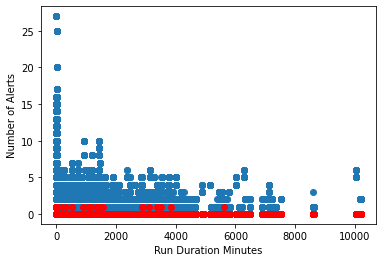

In [6]:
y_pred_sk = model.predict(train_data['run_duration_minutes'].values.reshape(-1, 1).astype('int'))
                          
plt.clf()
plt.scatter(train_data['run_duration_minutes'].values.reshape(-1, 1).astype('int'), train_data['number_of_alerts'].astype('int'))
plt.scatter(test_data['run_duration_minutes'].values.reshape(-1, 1).astype('int'), y_pred_sk, c="red")
plt.xlabel("Run Duration Minutes")
plt.ylabel("Number of Alerts")
plt.show()

### Print the logistic regression model's parameters

In [7]:
model.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 0,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

### Compute the decision function output for all classes

In [10]:
model.decision_function(train_data['run_duration_minutes'].values.reshape(-1, 1).astype('int'))

array([[  1.44036165,  -2.13770525,  -2.73806324, ..., -11.03606847,
        -11.82596559, -14.36499859],
       [  1.4356414 ,  -2.13655384,  -2.736961  , ..., -11.1636139 ,
        -12.07750669, -14.97402068],
       [  1.43092116,  -2.13540244,  -2.73585876, ..., -11.29115933,
        -12.3290478 , -15.58304277],
       ...,
       [  1.44036165,  -2.13770525,  -2.73806324, ..., -11.03606847,
        -11.82596559, -14.36499859],
       [  1.43092116,  -2.13540244,  -2.73585876, ..., -11.29115933,
        -12.3290478 , -15.58304277],
       [  1.4356414 ,  -2.13655384,  -2.736961  , ..., -11.1636139 ,
        -12.07750669, -14.97402068]])

### Compute the probabilities output for all classes in the prediction step

In [11]:
model.predict_proba(train_data['run_duration_minutes'].values.reshape(-1, 1).astype('int'))

array([[8.07877176e-01, 1.05403074e-01, 6.07167348e-02, ...,
        1.60971489e-05, 7.30642316e-06, 5.76792659e-07],
       [8.07639414e-01, 1.05576198e-01, 6.08167862e-02, ...,
        1.41782616e-05, 5.68496870e-06, 3.13899316e-07],
       [8.07382701e-01, 1.05747467e-01, 6.09157739e-02, ...,
        1.24878647e-05, 4.42325981e-06, 1.70825316e-07],
       ...,
       [8.07877176e-01, 1.05403074e-01, 6.07167348e-02, ...,
        1.60971489e-05, 7.30642316e-06, 5.76792659e-07],
       [8.07382701e-01, 1.05747467e-01, 6.09157739e-02, ...,
        1.24878647e-05, 4.42325981e-06, 1.70825316e-07],
       [8.07639414e-01, 1.05576198e-01, 6.08167862e-02, ...,
        1.41782616e-05, 5.68496870e-06, 3.13899316e-07]])

### Print the training accuracy

In [12]:
model.score(train_data['run_duration_minutes'].values.reshape(-1, 1).astype('int'), train_data['number_of_alerts'].astype('int'))

0.8073756111126013